# Assessment 2: Image Classification with Neural Networks

## Completion Requirements

- **Working code and written report**
- **Due date:** 11.59 pm (AEST), Sunday 14 September 2025 (Week 7)
- **Weighting:** 30%
- **Length:** Working code and 1000-word report (+/– 10%)
- **SILOs:** Implement a neural network with different learning algorithms for time-series forecasting with real-world data from industry (SILO 4).

## Purpose

The purpose of this assessment is to develop hands-on experience with neural networks for image classification – a key application of machine learning used across industries such as health care, autonomous systems and digital security to interpret and act on visual data.

## Task Details

This assessment aims to consolidate your knowledge and practical skills to build neural networks (NNs) for supervised learning. The task is formulated as a multi-class classification problem for handwritten images, and the goal is to model the relationship between the images’ content, network structure and labels. You need to provide:

- **Working code** (part 1)
- **A written report** of 1000 words on the method and results (part 2).

### Instructions

The MNIST database is a dataset with handwritten digits (from 0 to 9). The digits have been size-normalised and centred in a fixed-size image (28 × 28 pixels) with values from 0 to 1. You can use the following code with TensorFlow in Python to download the data.

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
```

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We will call the images 𝑥 and the labels 𝑦. Both the training set and test set contain 𝑥 and 𝑦.
Each image is 28 pixels by 28 pixels.
As mentioned, the corresponding labels in the MNIST are numbers between 0 and 9, describing which digit a given image represents. In this assessment, we regard the labels as one-hot vectors; that is, 0 in most dimensions, and 1 in a single dimension. In this case, the 𝑛-th digit will be represented as a vector, which is 1 in the 𝑛 dimensions. For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
The assessment aims to build NNs for classifying handwritten digits in the MNIST database, train it on the training set and test it on the test set. Since the main object of this assessment is for you to understand the relationship between input, model and output, you are not expected to achieve very high accuracy in model performance; instead, for each task, you should be able to identify how you can improve model performance with the change of network structure.

There are two parts to this assessment:

### Part 1
Part 1 is comprised of three main tasks:

**Task 1**

Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). Then you can change the model structure (i.e. number of dense layers, number of neurons in dense layers or activation functions) to be able to improve network performance.

**Task 2**

Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). Then you can change the number of convolutional layers and the number of filters or activation functions in the convolutional layers to be able to improve network performance.

**Task 3**

Change the type of optimiser or learning rate that you applied in the previous tasks and see how these changes can influence model performance. (You can keep the final network structure you applied in task 2 and try at least one different optimiser setting.)
Please read the following comments and requirements very carefully before starting the assessment:
1.	The assessment is based on the content of labs and Weeks 1–3.
2.	In Week 1 we talked about the use of training set, validation set and test set in machine learning. In this assessment, you are asked to train the NN on the training set and test the NN on the test set, without any given validation set. (If you want to monitor the training process, you can also try what we did in Week 3: you can consider the validation set is the same as the test set in this assessment.)
3.	In the assessment, the performance of an NN is measured by its prediction accuracy in classifying images from the test set (i.e. number of the correctly predicted images/number of the images in the test set).
4.	Since the MNIST dataset is a black-and-white image dataset, the shape of dataset is (dataset_length, 28,28). But to fit it into a conv2d layer, we need to make the input shape comply with its required format: (batch_size, image_width, image_depth, image_channels). Although batch_size can be decided later when you train it, you will still need to tell the number of image channels here. You can consider reshaping the dataset into (dataset_length, 28,28,1) or add one more dimension at the end with np.newaxis.
5.	You are expected to show at least two models in for tasks 1 and 2: one for the model you start with, and another model is the model that you identified to have better accuracy. For task 3, you need to show what optimiser and/or learning rate you applied.

### Part 2

Your report must at least contain the following content:
1.	Your name and student number.
2.	Architectures of the NNs, with figures for tasks 1 and 2.
3.	Description on the optimiser and learning rate you applied in the final model of task 2 and the optimiser or change of learning rate you used in task 3.
4.	Experiments and performances, with parameter setting.
5.	Discussion on the improvement/deterioration of the NN’s performance after changing the architecture and parameter setting for each task and findings of comparing the results from all three tasks.
6.	The ranking of all NNs’ performances from all the three tasks.

### Assessment criteria

This assessment will measure your ability to:

**Part 1:**

•	describe the two models, experiment settings and compare the results for task 1 (25%)
•	describe the two models, experiment settings and compare the results for task 2 (25%)
•	describe the two optimisers or learning rates, experiment settings and compare the results for task 3 (35%)

**Part 2:**

•	demonstrate correct code quality (10%)
•	research extensively and demonstrate depth of thinking; produce a well-structured report (5%).
Refer to the marking guide for marking and feedback information.

### Submission details

The submitted assessment consists of (1) a report (in PDF format) of no less than 1000 words and (2) all codes for modelling, training and testing the NN with TensorFlow in Python (you can choose to have one code file including all your codes, or you can have one code file for each task separately).
**If you use ChatGPT or other generative AI tools, you must cite them and clearly indicate your original contributions.**

In keeping with La Trobe University policy, all assignments are to be submitted in Moodle via Turnitin.
To be accepted, your assessment submission **must** generate a similarity score (you are responsible for checking this). Submitting in Word or PDF format is the best way to do this. If your submission does not generate a similarity score, it cannot be checked for plagiarism and therefore **will not be marked.**

Last modified: Tuesday, 12 August 2025, 8:58 PM




### Import the relevant dependencies 

In [36]:
from keras.datasets import mnist # ,cifar10, fashion_mnist, reuters, imdb, boston_housing, Which other datasets are available?
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### Define the training set features (X_train) and target variable (Y_train) as well as the test set features (X_test_) and target variable (Y_test)

In this assessment, we regard the labels as one-hot vectors; that is, 0 in most dimensions, and 1 in a single dimension. In this case, the 𝑛-th digit will be represented as a vector, which is 1 in the 𝑛 dimensions. For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

Shape of X_train:	 (60000, 28, 28)
Shape of X_test:	 (10000, 28, 28)
Shape of Y_train:	 (60000,)
Shape of Y_test:	 (10000,)
X_train data 1-th element:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  

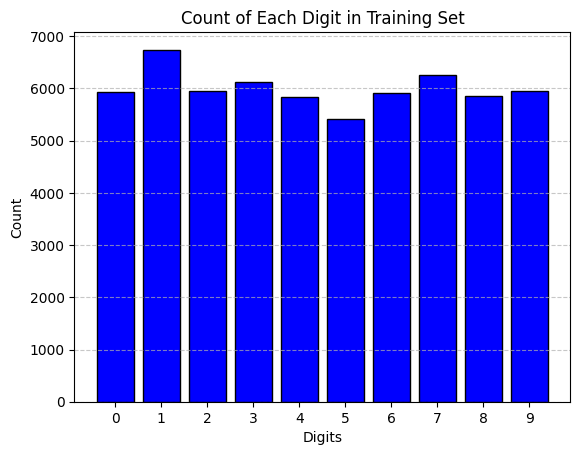

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# we set the line width to a large value to avoid line breaks in the output
with np.printoptions(linewidth=10000):
    print("Shape of X_train:\t", X_train.shape)
    print("Shape of X_test:\t", X_test.shape)
    print("Shape of Y_train:\t", Y_train.shape)
    print("Shape of Y_test:\t", Y_test.shape)

    n = 1
    print(f"X_train data {n}-th element:\n", X_train[n])
    print("And its corresponding label:\t", Y_train[n])
    
    # TODO: For using this data in a neural network,
    # Tensorflow/Keras expects the input data to be in a 1D or 2D array format where each row represents a single sample and each column represents a feature. The general format for the input shape is: (batch_size, feature_1, feature_2, ...)
    # However, we can use the tf.keras.layers.Flatten layer as the first layer in our sequential model. 
    # This layer automatically flattens the input shape without the need for manual reshaping of our data. 
    # For a Dense (fully connected) network: We must flatten each 28x28 image into a single 1D array of 784 pixels. The input shape for the first layer of our model would then be (None, 784), where None represents a variable batch size.
    # For a Convolutional Neural Network (CNN): We must add a channel dimension. Since the images are grayscale, there is only one channel. We would reshape the data to (number_of_images, 28, 28, 1). The input shape for the first layer (typically a Conv2D layer) would be (28, 28, 1). The batch size is handled automatically by Keras.
    # Scaling can also be performd in the model using a tf.keras.layers.Rescaling or keras.layers.Normalization layer as the first layer in our sequential model.
    # The advantage of using these layers is that they integrate seamlessly into the model architecture, ensuring that the data is preprocessed consistently during both training and inference. 
    # This approach also simplifies the code by reducing the need for separate preprocessing steps outside the model definition.
    # And, it ensures that inference data is processed in the same way as training data, which is crucial for maintaining model performance.

    dataset_distribution = np.unique(Y_train, return_counts=True)
    digits =dataset_distribution[0]
    counts = dataset_distribution[1]
    print("Digits:\t", digits)
    print("Count per digit\t", counts)
    avg = np.mean(counts)
    print(f"Average sample size: {avg}")
    max = np.max(counts)
    min = np.min(counts)
    print(f"Maximum sample size: {max}")
    print(f"Minimum sample size: {min}")    

# Create a bar chart from the counts and digits
plt.bar(digits, counts, color='blue', edgecolor='black')

# Set the title and labels
plt.title('Count of Each Digit in Training Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them
plt.xticks(digits)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


## Dataset Analysis

The content and size of the training and testing datasets align with the description on the Kaggle MNIST dataset page, Hojjat, F. (2017). MNIST: The Most Famous Dataset in the World. Kaggle. Retrieved August 28, 2025, from https://www.kaggle.com/datasets/hojjatk/mnist-dataset. The plot of digit distribution shows a fairly homogeneous representation across all classes (digits 0 through 9). While the digit '1' is slightly oversampled and the digit '5' is slightly undersampled, the class imbalance is not significant enough to warrant further action for this assessment.

In a scenario where the distribution were to be significantly imbalanced and we needed to make it more homogeneous, we would use a technique called **resampling**. Resampling involves adjusting the distribution of the training data to be more balanced. There are two primary types:

- **Oversampling** involves duplicating samples from the underrepresented classes to increase their frequency.

- **Undersampling** involves removing samples from the overrepresented classes to reduce their frequency.

### Creating a Neural Network

in the following cells a simple 

In [ ]:
# to create reproducible results when writing code with tensorflow and numpy
tf.compat.v1.set_random_seed(1)
np.random.seed(23)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)  # verbose: setting of whether to show the progress bar; 0: not show, 1: show

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:





# # load the dataset
# filename = 'diabetes.csv'
# dataframe = pd.read_csv(filename, header=0) # first row is set as the column name of the dataframe
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=77, random_state=7)







